Xb: 0, Yb: 0.8430514889896433
Vértices da Base B:
 [[ 0.075       0.575       0.5        -0.5        -0.575      -0.075     ]
 [-0.84305149  0.02297391  0.15287773  0.15287773  0.02297391 -0.84305149]
 [ 0.          0.          0.          0.          0.          0.        ]]
Matriz de Rotação R:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


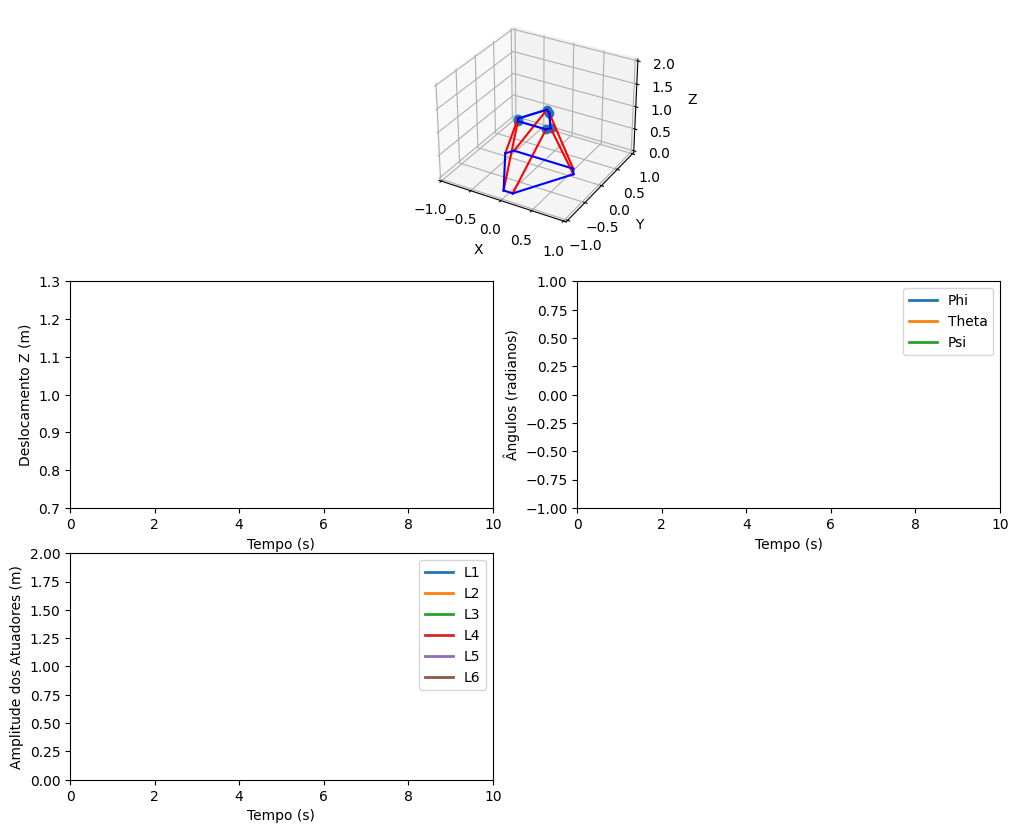

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Funções para calcular áreas e centroides
def A1(b, d):
    return (np.sqrt(3) * d / 2) * (d / 2) / 2

def C1(b, d):
    return (np.sqrt(3) * d / 2) / 3 + np.sqrt(3) * b / 2

def A2(b, d):
    return (np.sqrt(3) * d / 2) * (d / 2) / 2

def C2(b, d):
    return (np.sqrt(3) * d / 2) / 3 + np.sqrt(3) * b / 2

def A3(b, d):
    return (np.sqrt(3) * d / 2) * b

def C3(b, d):
    return (np.sqrt(3) * d / 2) / 2 + np.sqrt(3) * b / 2

def A4(b, d):
    return (np.sqrt(3) * b / 2) * (b / 2) / 2

def C4(b, d):
    return (np.sqrt(3) * b / 2) / 2 + np.sqrt(3) * b / 2

def A5(b, d):
    return (np.sqrt(3) * b / 2) * (b / 2) / 2

def C5(b, d):
    return (np.sqrt(3) * b / 2) * 2 / 3

def A6(b, d):
    return (np.sqrt(3) * b / 2) * d

def C6(b, d):
    return (np.sqrt(3) * b / 2) / 2

def calculate_centroids(b, d):
    A = [A1(b, d), A2(b, d), A3(b, d), A4(b, d), A5(b, d), A6(b, d)]
    C = [C1(b, d), C2(b, d), C3(b, d), C4(b, d), C5(b, d), C6(b, d)]
    somaCA = sum(A[i] * C[i] for i in range(6))
    somaA = sum(A)
    Yb = somaCA / somaA
    return 0, Yb

# Função para calcular os vértices da base
def B_vertices(d, b, Yb):
    return np.array([
        [d / 2, (d + b) / 2, b / 2, -b / 2, -(d + b) / 2, -d / 2],
        [-Yb, np.sqrt(3) * b / 2 - Yb, np.sqrt(3) * (b + d) / 2 - Yb, np.sqrt(3) * (b + d) / 2 - Yb, np.sqrt(3) * b / 2 - Yb, -Yb],
        [0, 0, 0, 0, 0, 0]
    ])

# Função para calcular os vértices da placa superior
def P_vertices(x, y, z, R, a, ds):
    P = np.array([x, y, z])
    S = np.zeros((6, 3))

    S[0] = np.dot(R, np.array([a / 2 - ds * np.sin(30 * np.pi / 180) / 2, -np.sqrt(3) * a / 6 - ds * np.cos(30 * np.pi / 180) / 2, 0])) + P
    S[1] = np.dot(R, np.array([a / 2 + ds * np.sin(30 * np.pi / 180) / 2, -np.sqrt(3) * a / 6 + ds * np.cos(30 * np.pi / 180) / 2, 0])) + P
    S[2] = np.dot(R, np.array([ds / 2, np.sqrt(3) * a / 3 - ds * np.cos(30 * np.pi / 180) / 2, 0])) + P
    S[3] = np.dot(R, np.array([-ds / 2, np.sqrt(3) * a / 3 + ds * np.cos(30 * np.pi / 180) / 2, 0])) + P
    S[4] = np.dot(R, np.array([-a / 2 - ds * np.sin(30 * np.pi / 180) / 2, -np.sqrt(3) * a / 6 + ds * np.cos(30 * np.pi / 180) / 2, 0])) + P
    S[5] = np.dot(R, np.array([-a / 2 + ds * np.sin(30 * np.pi / 180) / 2, -np.sqrt(3) * a / 6 - ds * np.cos(30 * np.pi / 180) / 2, 0])) + P

    return S

# Funções para calcular as matrizes de rotação
def Rx(t):
    return np.array([
        [1, 0, 0],
        [0, np.cos(t), -np.sin(t)],
        [0, np.sin(t), np.cos(t)]
    ])

def Ry(t):
    return np.array([
        [np.cos(t), 0, np.sin(t)],
        [0, 1, 0],
        [-np.sin(t), 0, np.cos(t)]
    ])

def Rz(t):
    return np.array([
        [np.cos(t), -np.sin(t), 0],
        [np.sin(t), np.cos(t), 0],
        [0, 0, 1]
    ])

# Função para calcular os comprimentos dos atuadores
def actuator_lengths(S, B):
    L = np.zeros(6)
    for i in range(6):
        L[i] = np.sqrt((S[i, 0] - B[0, i])**2 + (S[i, 1] - B[1, i])**2 + (S[i, 2] - B[2, i])**2)
    return L

# Parâmetros do sistema
a = 0.5
ds = 0.075
b = 1
d = 0.15
x = 0
y = 0
theta = 0
psi = 0
phi = 0

Xb, Yb = calculate_centroids(b, d)
print(f"Xb: {Xb}, Yb: {Yb}")

B = B_vertices(d, b, Yb)
print("Vértices da Base B:\n", B)

R = np.dot(np.dot(Ry(phi), Rx(psi)), Rz(theta))
print("Matriz de Rotação R:\n", R)

# Configuração para a animação
fig = plt.figure(figsize=(12, 10))

# Gráfico 3D
ax3d = fig.add_subplot(311, projection='3d')
ax3d.set_xlim([-1, 1])
ax3d.set_ylim([-1, 1])
ax3d.set_zlim([0, 2])
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')

# Gráfico 2D - Deslocamento
ax_disp = fig.add_subplot(323)
ax_disp.set_xlim([0, 10])
ax_disp.set_ylim([0.7, 1.3])
ax_disp.set_xlabel('Tempo (s)')
ax_disp.set_ylabel('Deslocamento Z (m)')
disp_line, = ax_disp.plot([], [], lw=2)

# Gráfico 2D - Ângulos
ax_angle = fig.add_subplot(324)
ax_angle.set_xlim([0, 10])
ax_angle.set_ylim([-1, 1])
ax_angle.set_xlabel('Tempo (s)')
ax_angle.set_ylabel('Ângulos (radianos)')
phi_line, = ax_angle.plot([], [], lw=2, label='Phi')
theta_line, = ax_angle.plot([], [], lw=2, label='Theta')
psi_line, = ax_angle.plot([], [], lw=2, label='Psi')
ax_angle.legend()

# Gráfico 2D - Amplitudes dos atuadores
ax_amp = fig.add_subplot(325)
ax_amp.set_xlim([0, 10])
ax_amp.set_ylim([0, 2])
ax_amp.set_xlabel('Tempo (s)')
ax_amp.set_ylabel('Amplitude dos Atuadores (m)')
amp_lines = [ax_amp.plot([], [], lw=2, label=f'L{i+1}')[0] for i in range(6)]
ax_amp.legend()

# Dados para os gráficos 2D
times = np.linspace(0, 10, 500)
displacements = 1 + 0.3 * np.sin(3 * times)
phis = np.zeros_like(times)
thetas = np.zeros_like(times)
psis = np.zeros_like(times)

# Amplitudes dos atuadores
amplitudes = np.zeros((6, len(times)))

# Calculando amplitudes ao longo do tempo
for i, t in enumerate(times):
    z = 1 + 0.3 * np.sin(3 * t)
    S = P_vertices(x, y, z, R, a, ds)
    L = actuator_lengths(S, B)
    for j in range(6):
        amplitudes[j, i] = L[j]

# Função de atualização para a animação
def update(num, B, a, ds, x, y, R, lines, disp_line, phi_line, theta_line, psi_line, amp_lines):
    t = num / 50.0
    z = 1 + 0.3 * np.sin(3 * t)
    #z = 1

    S = P_vertices(x, y, z, R, a, ds)

    # Atualiza os pontos da plataforma
    lines['platform'].set_data(S[:, 0], S[:, 1])
    lines['platform'].set_3d_properties(S[:, 2])

    for i in range(6):
        lines['actuators'][i].set_data([B[0, i], S[i, 0]], [B[1, i], S[i, 1]])
        lines['actuators'][i].set_3d_properties([B[2, i], S[i, 2]])

    for i in range(6):
        lines['base'][i].set_data([B[0, i], B[0, (i+1) % 6]], [B[1, i], B[1, (i+1) % 6]])
        lines['base'][i].set_3d_properties([B[2, i], B[2, (i+1) % 6]])


    for i in range(6):
        lines['platform_edges'][i].set_data([S[i, 0], S[(i+1) % 6, 0]], [S[i, 1], S[(i+1) % 6, 1]])
        lines['platform_edges'][i].set_3d_properties([S[i, 2], S[(i+1) % 6, 2]])

    # Atualiza os gráficos 2D
    disp_line.set_data(times[:num], displacements[:num])
    phi_line.set_data(times[:num], phis[:num])
    theta_line.set_data(times[:num], thetas[:num])
    psi_line.set_data(times[:num], psis[:num])
    for i in range(6):
        amp_lines[i].set_data(times[:num], amplitudes[i, :num])

    return [lines['platform']] + lines['actuators'] + lines['base'] + lines['platform_edges'] + [disp_line, phi_line, theta_line, psi_line] + amp_lines

# Configuração das linhas para o gráfico 3D
lines = {
    'platform': ax3d.plot([], [], [], 'o-')[0],
    'actuators': [ax3d.plot([], [], [], 'r-')[0] for _ in range(6)],
    'base': [ax3d.plot([], [], [], 'b-')[0] for _ in range(6)],
    'platform_edges': [ax3d.plot([], [], [], 'b-')[0] for _ in range(6)]
}

# Criação da animação
ani = animation.FuncAnimation(fig, update, frames=len(times), fargs=(B, a, ds, x, y, R, lines, disp_line, phi_line, theta_line, psi_line, amp_lines),
                              interval=20, blit=True)

plt.show()
